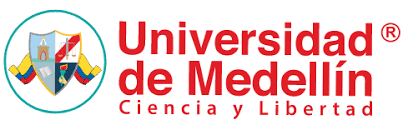

**Integrantes:**

- John Freddy Ossa 
- Maria Camila Morales
- Juan Diego Altamar
- Pablo Troncoso


#### A continuación realizaremos el Análisis Exploratorio de Datos AED con el fin de validar y verificar la información a través de la estadística descriptiva para posteriormente realizar inferencia sobre la población objetivo.

# **1. Presentación de los datos**

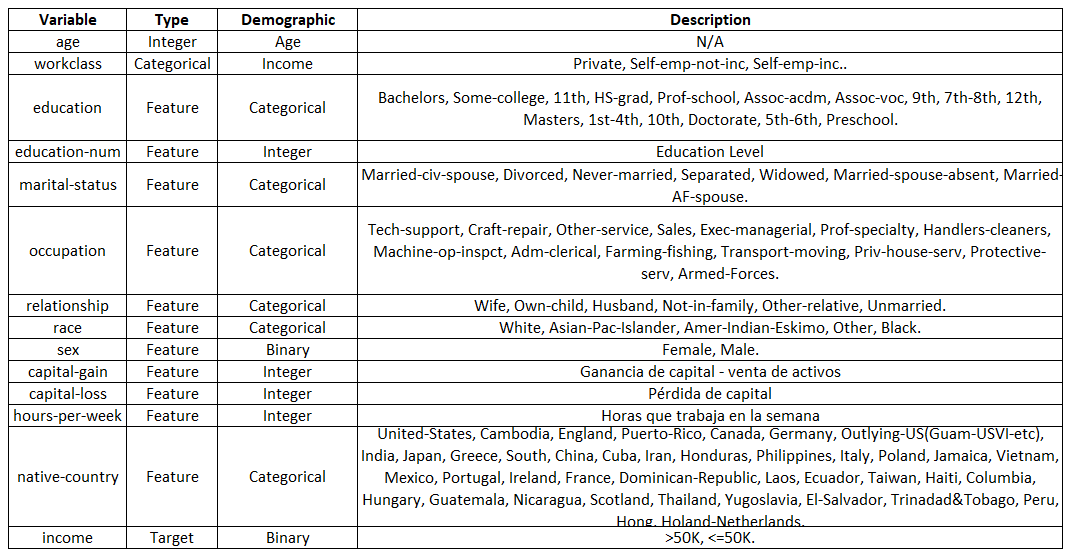

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [3]:
adult = fetch_ucirepo(id=2) 

In [4]:
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
df = pd.concat([adult.data.features, adult.data.targets], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Información básica del dataset
print("=== INFORMACIÓN GENERAL ===")
print(f"Dimensiones: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)
print("\n=== INFORMACIÓN DEL DATASET ===")
df.info()

=== INFORMACIÓN GENERAL ===
Dimensiones: (48842, 15)
Memoria utilizada: 29.79 MB

=== TIPOS DE DATOS ===
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupat

In [7]:
# Estadísticas descriptivas para variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Estadísticas descriptivas para variables categóricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Valores más frecuentes:")
    print(df[col].value_counts().head())

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===

workclass:
  Valores únicos: 9
  Valores más frecuentes:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Name: count, dtype: int64

education:
  Valores únicos: 16
  Valores más frecuentes:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

marital-status:
  Valores únicos: 7
  Valores más frecuentes:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

occupation:
  Valores únicos: 15
  Valores más frecuentes:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

relationship:
  Valores únicos: 6
  Valores más fre

=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===
Conteos absolutos:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Proporciones:
income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: proportion, dtype: float64


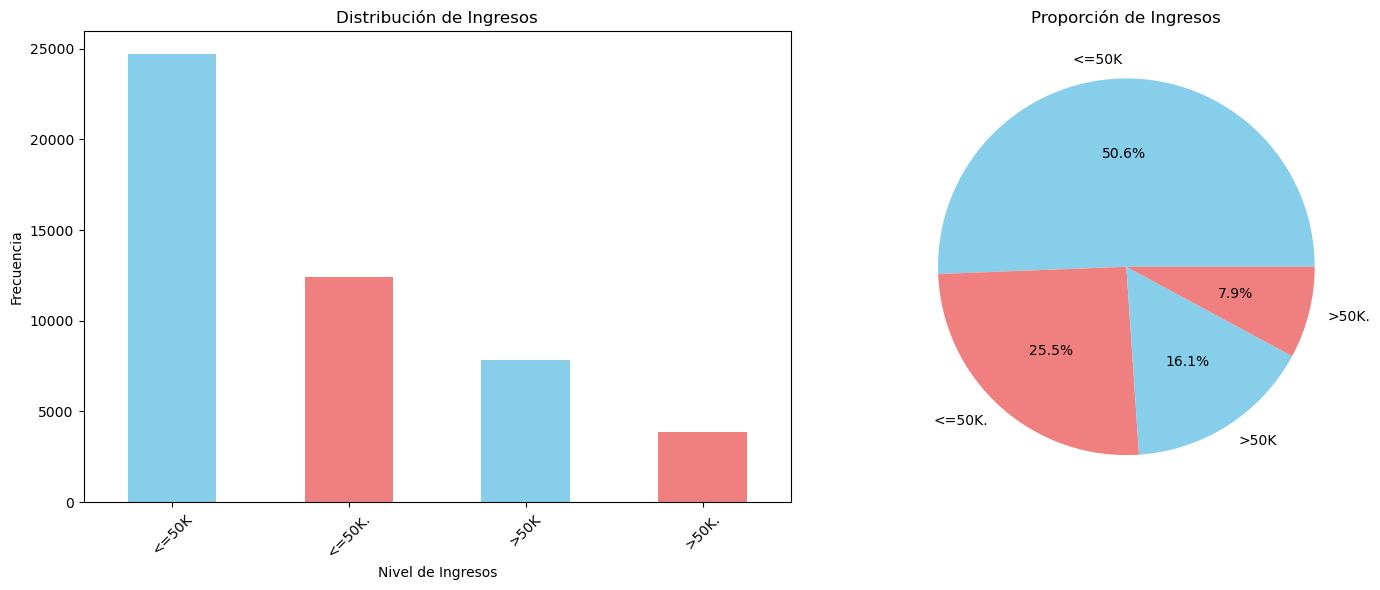

In [9]:
# Análisis de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
target_counts = df['income'].value_counts()
target_props = df['income'].value_counts(normalize=True)

print("Conteos absolutos:")
print(target_counts)
print("\nProporciones:")
print(target_props)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Distribución de Ingresos')
axes[0].set_xlabel('Nivel de Ingresos')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de pastel
target_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Proporción de Ingresos')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Variables numéricas: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


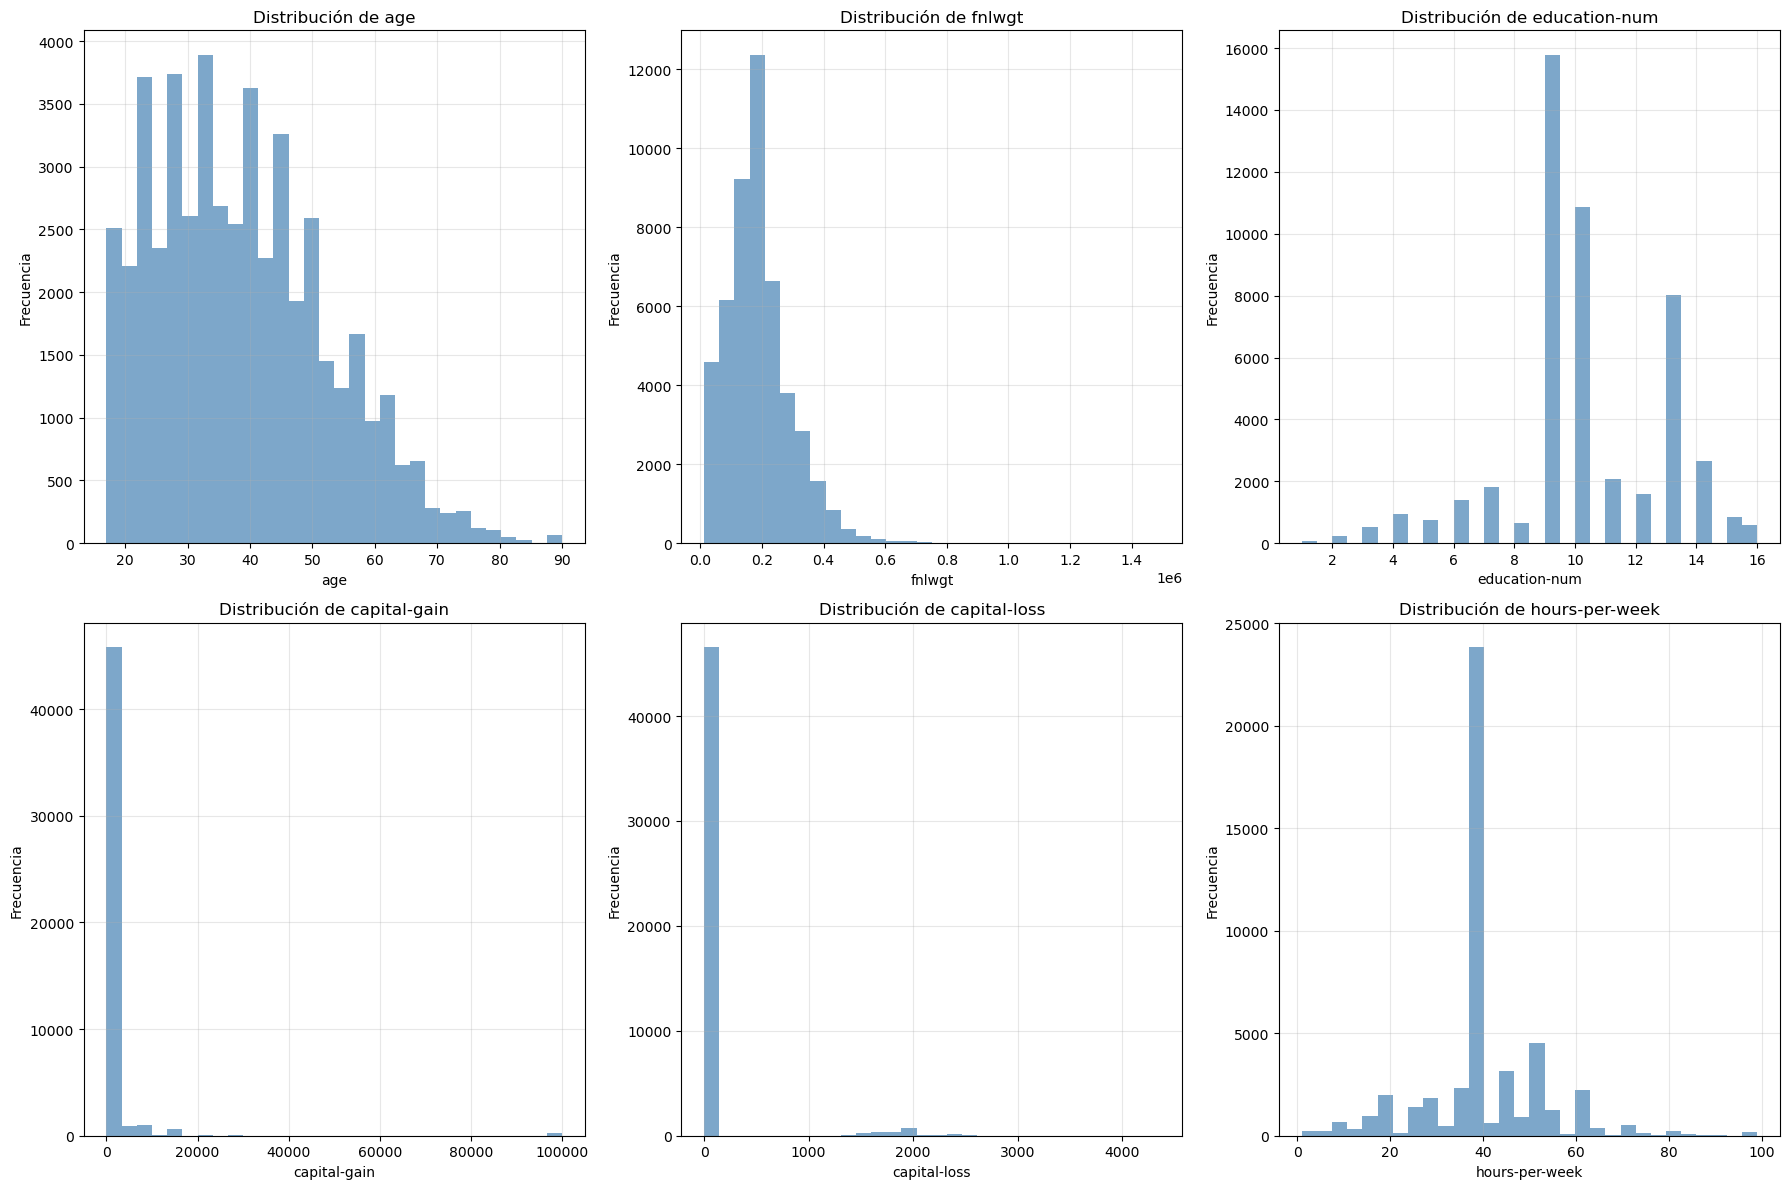

In [10]:
# Análisis de variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas: {list(numerical_cols)}")

# Histogramas de variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

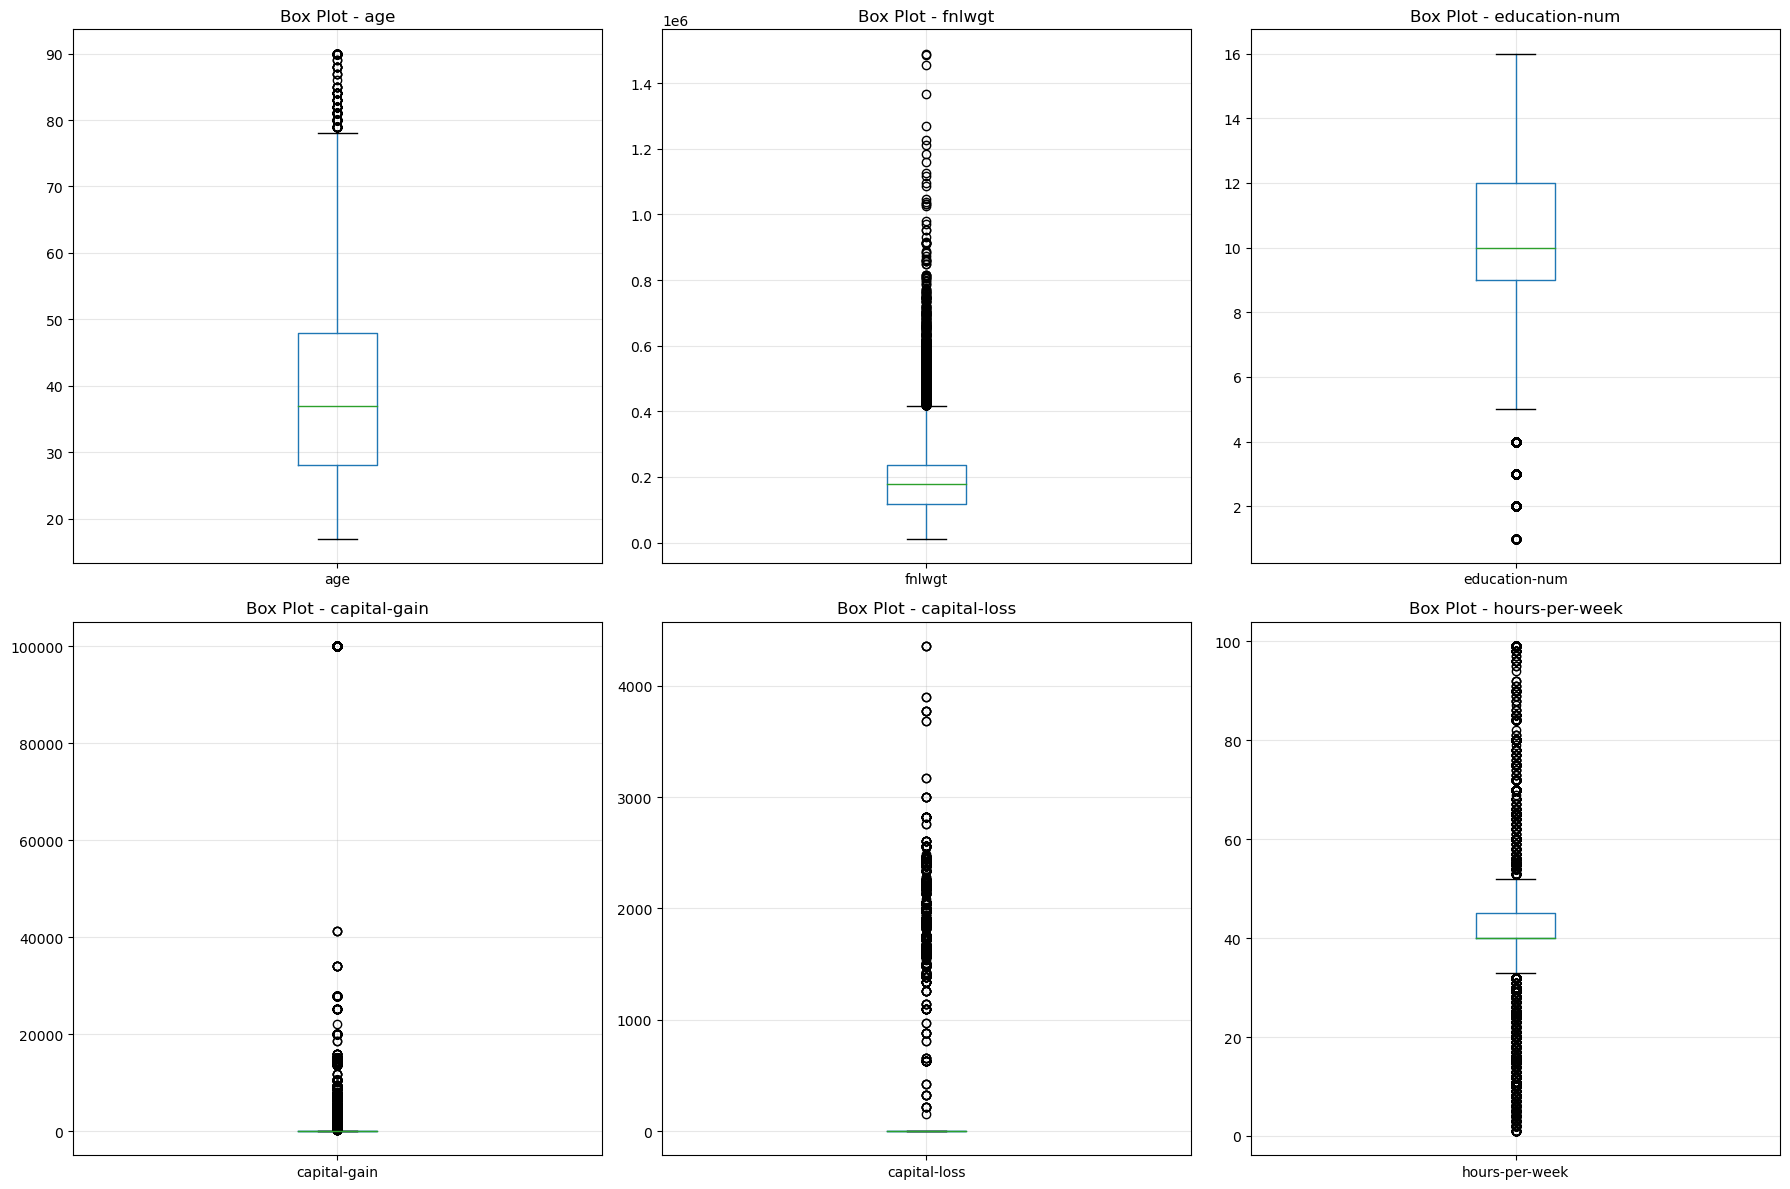

In [11]:
# Box plots para identificar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot - {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Estadísticas descriptivas para variables categóricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Valores más frecuentes:")
    print(df[col].value_counts().head())

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===

workclass:
  Valores únicos: 9
  Valores más frecuentes:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Name: count, dtype: int64

education:
  Valores únicos: 16
  Valores más frecuentes:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

marital-status:
  Valores únicos: 7
  Valores más frecuentes:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

occupation:
  Valores únicos: 15
  Valores más frecuentes:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

relationship:
  Valores únicos: 6
  Valores más fre

Variables categóricas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


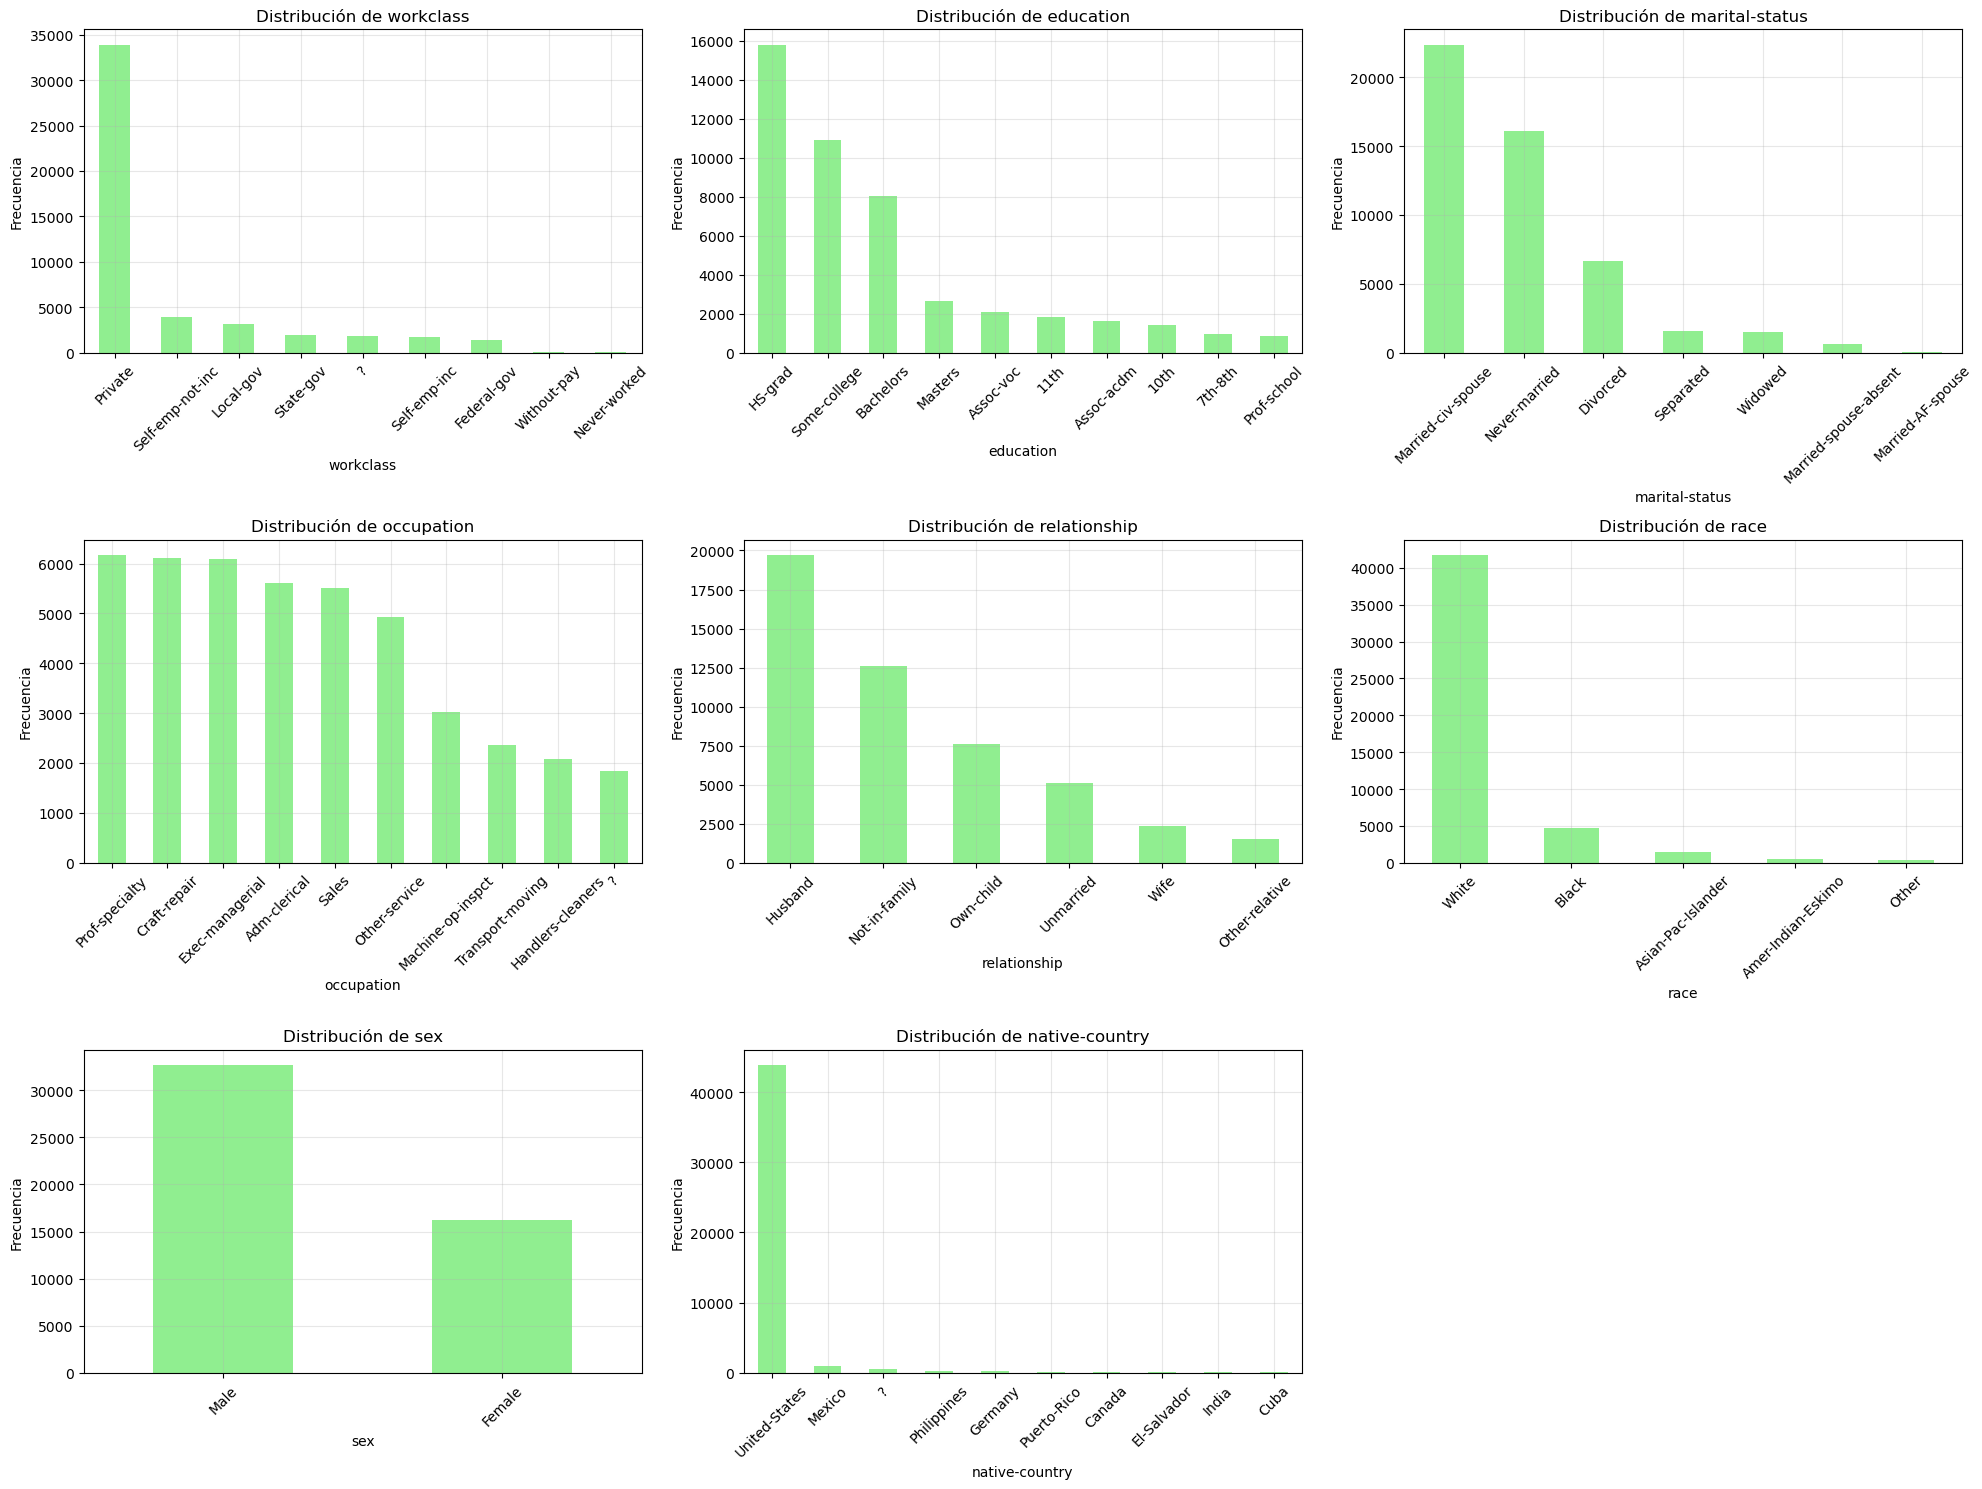

In [13]:
# Análisis de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'income']  # Excluir target

print(f"Variables categóricas: {list(categorical_cols)}")

# Crear subplots para variables categóricas
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    
    # Mostrar solo los top 10 para variables con muchas categorías
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
    
    value_counts.plot(kind='bar', ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

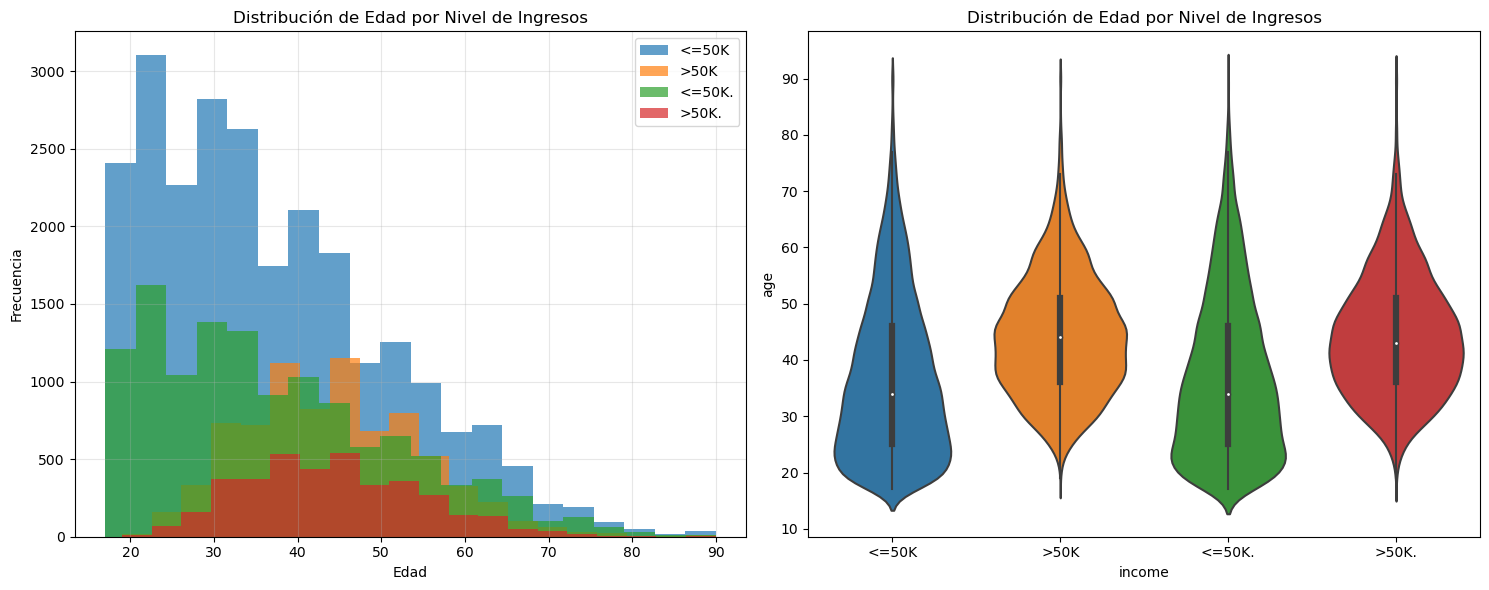

In [14]:
# Análisis de edad por nivel de ingresos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma superpuesto
for income_level in df['income'].unique():
    subset = df[df['income'] == income_level]
    axes[0].hist(subset['age'], bins=20, alpha=0.7, label=income_level)

axes[0].set_title('Distribución de Edad por Nivel de Ingresos')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='income', y='age', ax=axes[1])
axes[1].set_title('Distribución de Edad por Nivel de Ingresos')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE VALORES FALTANTES ===
Variables con valores faltantes:
                Missing_Count  Missing_Percentage
occupation                966            1.977806
workclass                 963            1.971664
native-country            274            0.560993


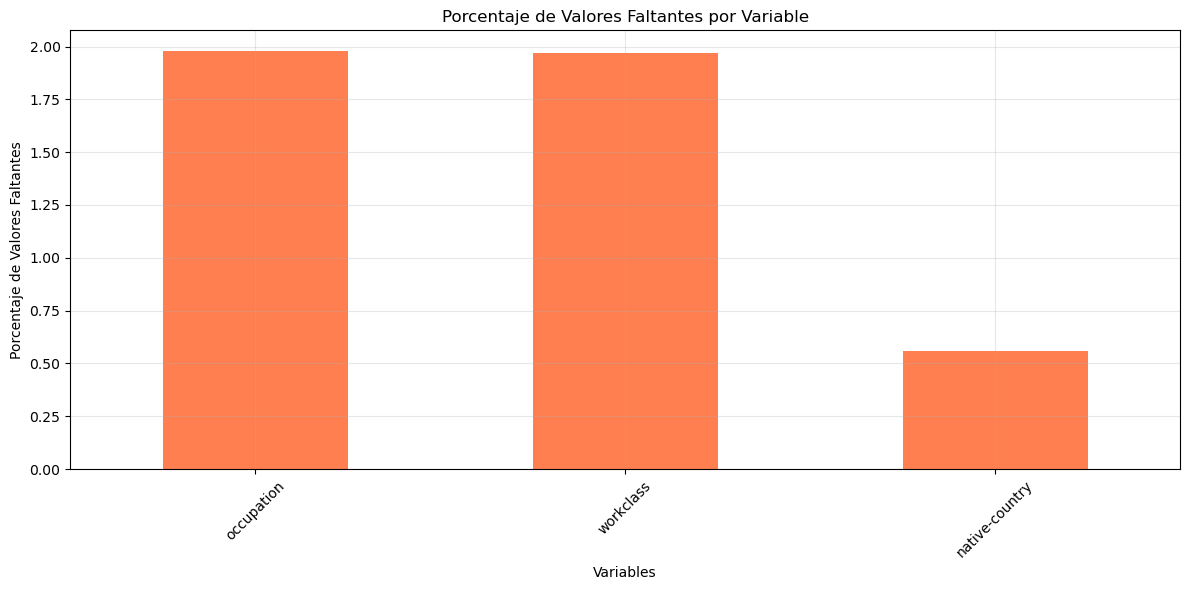


=== BÚSQUEDA DE VALORES '?' (POSIBLES VALORES FALTANTES) ===
Variables con valores '?':
workclass: 1836 (3.76%)
occupation: 1843 (3.77%)
native-country: 583 (1.19%)


In [15]:
# Análisis de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")

# Contar valores nulos
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Variables con valores faltantes:")
    print(missing_df)
    
    # Visualización de valores faltantes
    plt.figure(figsize=(12, 6))
    missing_df['Missing_Percentage'].plot(kind='bar', color='coral')
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron valores faltantes explícitos (NaN)")

# Buscar valores '?' que pueden representar valores faltantes
print("\n=== BÚSQUEDA DE VALORES '?' (POSIBLES VALORES FALTANTES) ===")
question_marks = {}
for col in df.select_dtypes(include=['object']).columns:
    count = (df[col] == '?').sum()
    if count > 0:
        question_marks[col] = count

if question_marks:
    print("Variables con valores '?':")
    for col, count in question_marks.items():
        percentage = (count / len(df)) * 100
        print(f"{col}: {count} ({percentage:.2f}%)")
else:
    print("No se encontraron valores '?' en el dataset")

=== ANÁLISIS DE OUTLIERS (MÉTODO IQR) ===
         Variable  Outliers_Count  Outliers_Percentage  Lower_Bound  \
0             age             216             0.442242        -2.00   
1          fnlwgt            1453             2.974899    -62586.75   
2   education-num            1794             3.673068         4.50   
3    capital-gain            4035             8.261332         0.00   
4    capital-loss            2282             4.672208         0.00   
5  hours-per-week           13496            27.631956        32.50   

   Upper_Bound  
0        78.00  
1    417779.25  
2        16.50  
3         0.00  
4         0.00  
5        52.50  


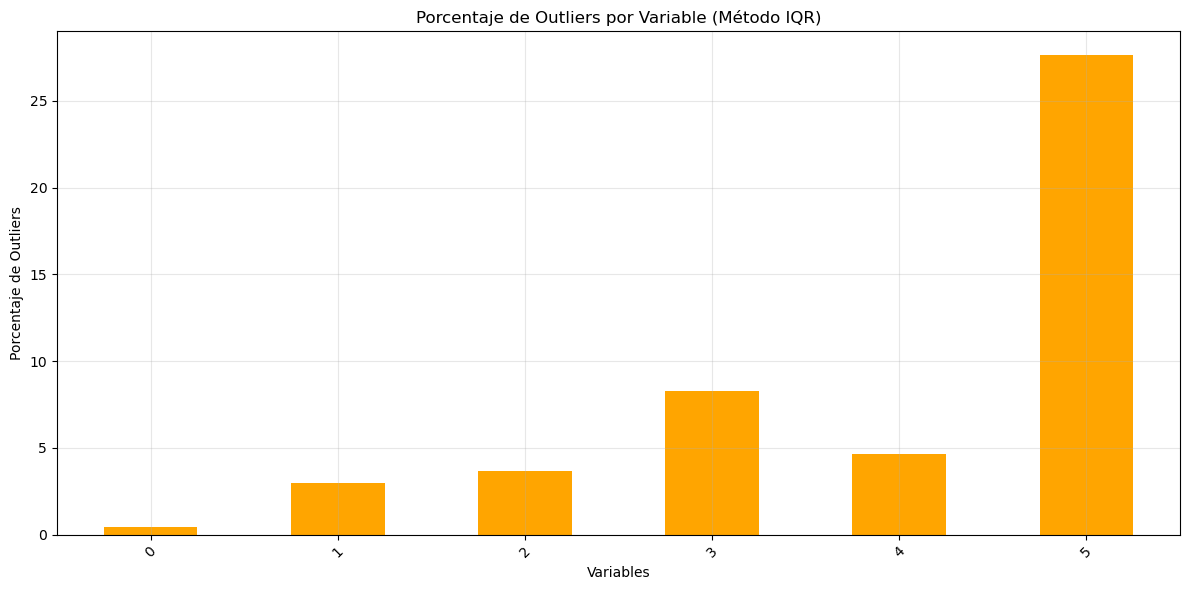

In [16]:
# Detección de outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== ANÁLISIS DE OUTLIERS (MÉTODO IQR) ===")

outlier_summary = []

for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outliers_Count': outlier_count,
        'Outliers_Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# Visualización de outliers
plt.figure(figsize=(12, 6))
outlier_df['Outliers_Percentage'].plot(kind='bar', color='orange')
plt.title('Porcentaje de Outliers por Variable (Método IQR)')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Outliers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
variables = ['age','education-num','capital-gain','capital-loss','hours-per-week']
medida = pd.DataFrame(index=variables)
medida['Media'] = df[variables].mean()
medida['Mediana'] = df[variables].median()
medida['Moda'] = df[variables].mode().iloc[0]

# Mostrar la tabla
print(medida)

                      Media  Mediana  Moda
age               38.643585     37.0    36
education-num     10.078089     10.0     9
capital-gain    1079.067626      0.0     0
capital-loss      87.502314      0.0     0
hours-per-week    40.422382     40.0    40


In [18]:
# Creamos un resumen con medidas de variabilidad
variabilidad = pd.DataFrame({
    'Varianza': df[variables].var(),
    'Desviación estándar': np.sqrt(df[variables].var()),
    'Cte de Variacion': (np.sqrt(df[variables].var())/df[variables].mean())*100,
    'Rango': df[variables].max() - df[variables].min()
})

# Redondeamos los valores
variabilidad = variabilidad.round(2)

# Mostramos el resultado
print(variabilidad)

                   Varianza  Desviación estándar  Cte de Variacion  Rango
age                  187.98                13.71             35.48     73
education-num          6.61                 2.57             25.51     15
capital-gain    55532588.04              7452.02            690.60  99999
capital-loss      162412.67               403.00            460.56   4356
hours-per-week       153.55                12.39             30.65     98


In [19]:
# Calcular asimetría y curtosis
medidas_forma = pd.DataFrame({
    'Asimetría (Skewness)': df[variables].skew(),
    'Curtosis': df[variables].kurt()
})

print(medidas_forma)

                Asimetría (Skewness)    Curtosis
age                         0.557580   -0.184269
education-num              -0.316525    0.625745
capital-gain               11.894659  152.693096
capital-loss                4.569809   20.014346
hours-per-week              0.238750    2.951059


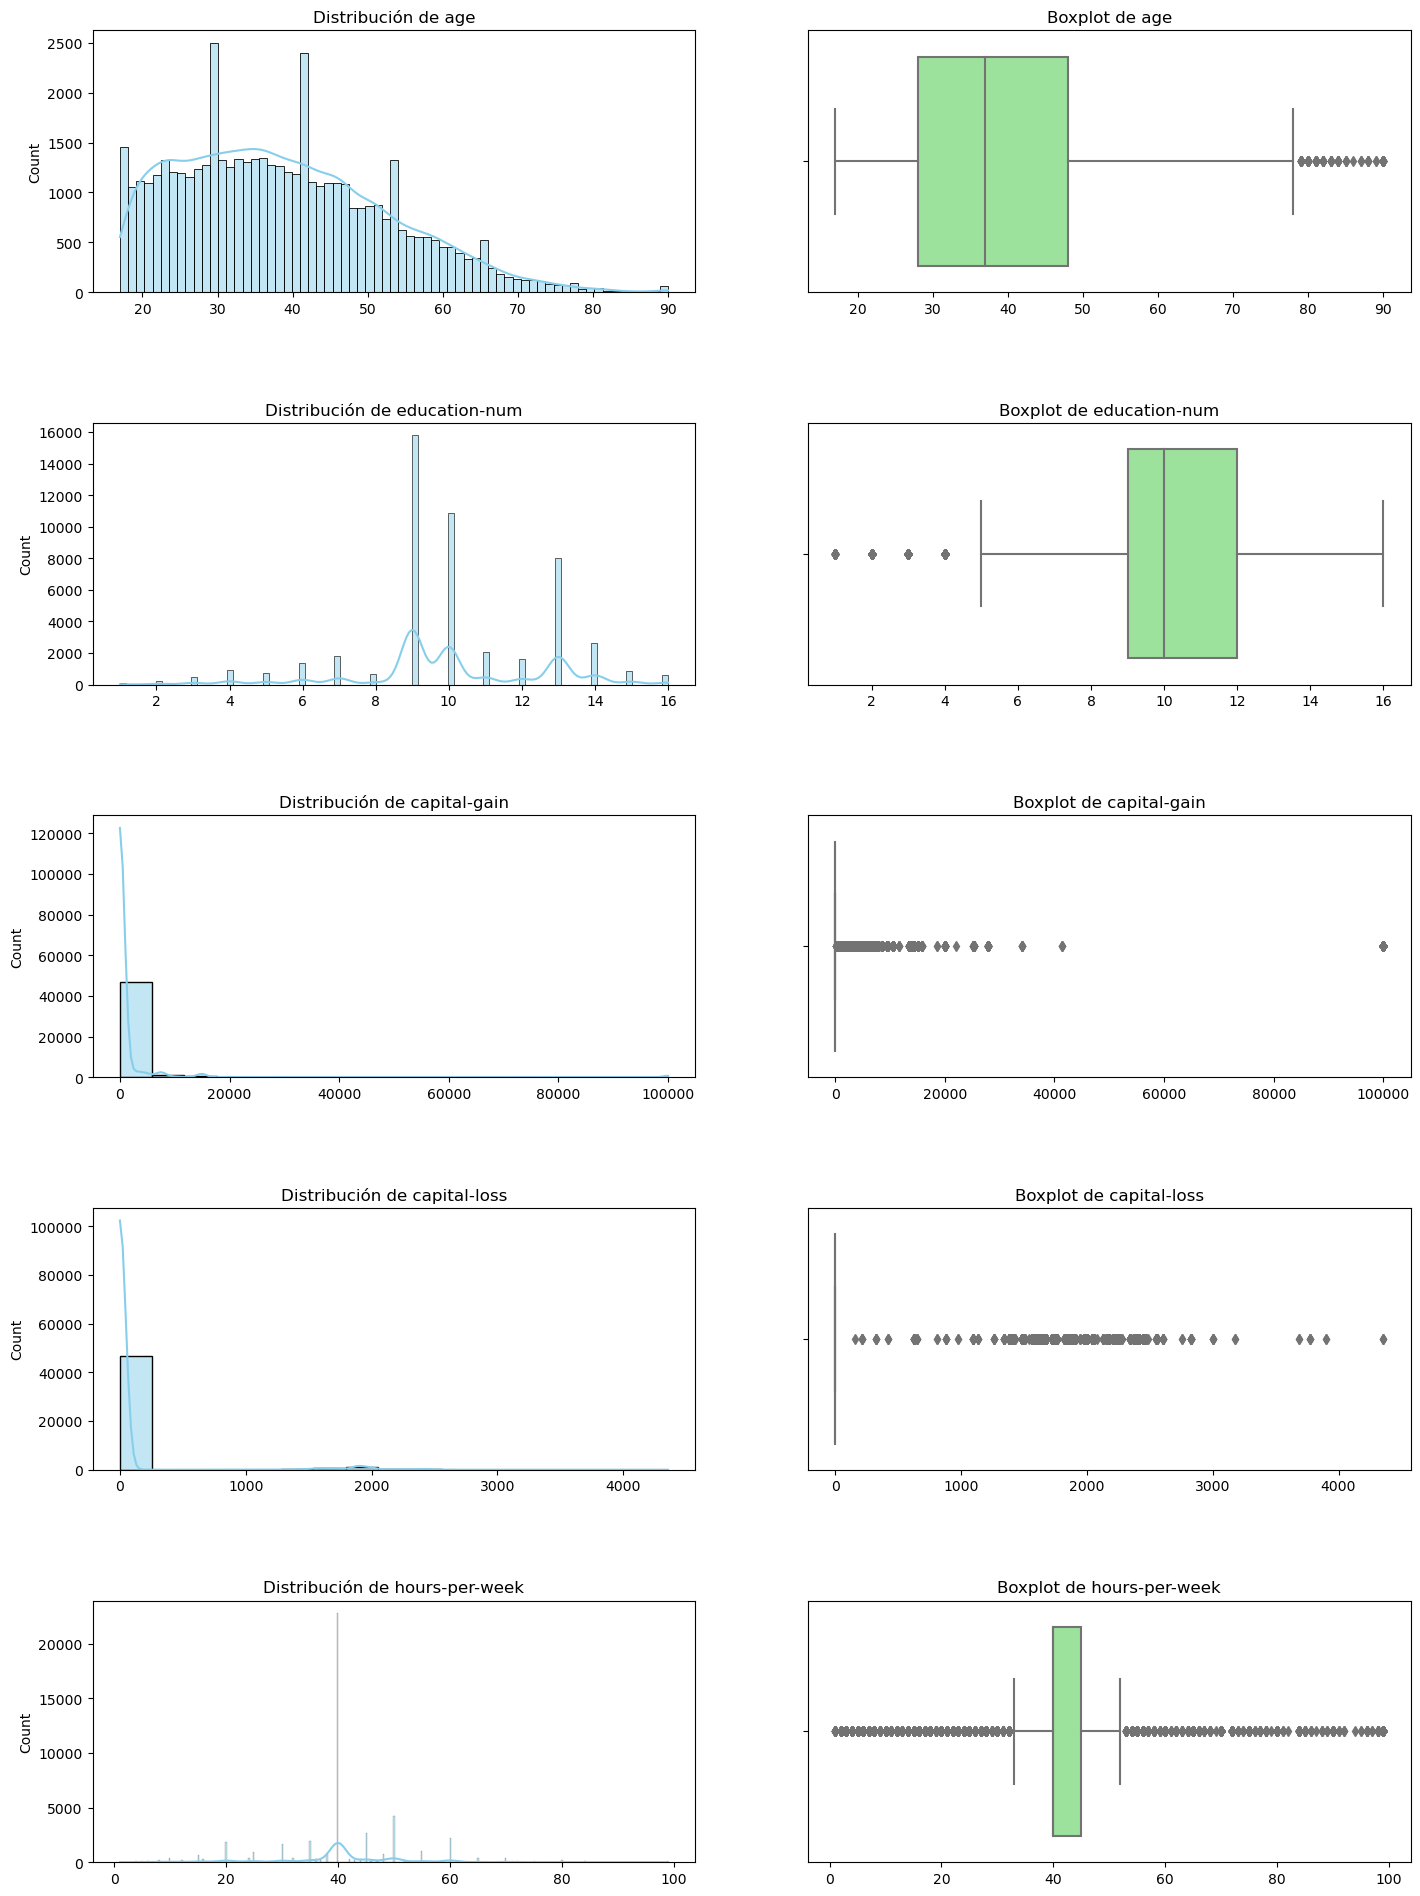

In [20]:
# Lista de variables numéricas para graficar

# Crear figura de subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(15, len(variables)*4))
fig.tight_layout(pad=5.0)

# Generar gráficos
for i, var in enumerate(variables):
    # Histograma + KDE
    sns.histplot(df[var], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribución de {var}')
    axes[i, 0].set_xlabel('')

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot de {var}')
    axes[i, 1].set_xlabel('')

plt.subplots_adjust(hspace=0.5)
plt.show()

Medidas y gráficas descriptivas multivariadas

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


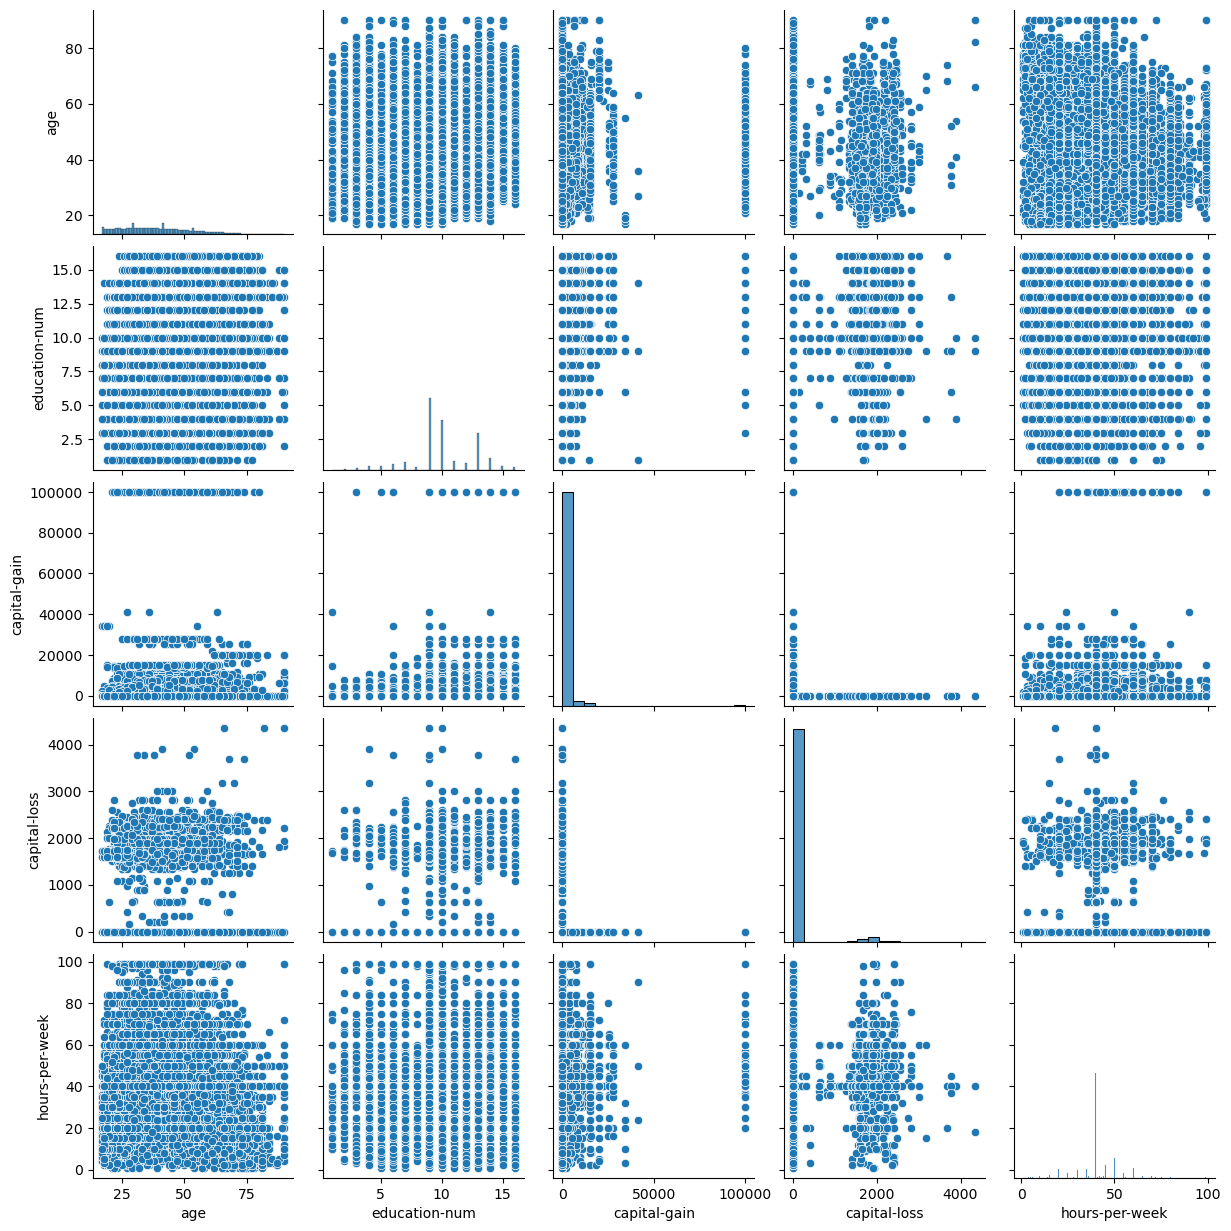

In [21]:
#Se toman todas las variables para revisar la correlación
continuas=df[variables]
sns.pairplot(continuas)

In [22]:
#Matriz de correlación
correlacion_matrix = continuas.corr()
continuas.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


<Axes: >

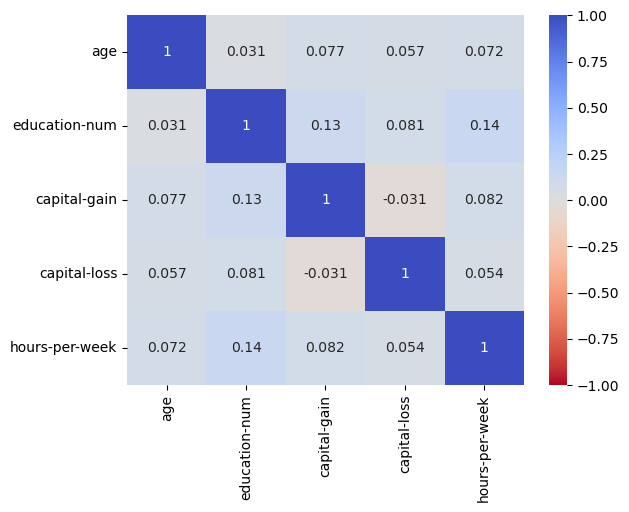

In [23]:
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm_r",center=0, vmin=-1, vmax=1)

## Analisis del EDA.


*   **Variable Objetivo (Ingresos):** Encontramos que la variable que queremos predecir ('income') está desbalanceada. Aproximadamente el **76.07%** de los individuos tienen ingresos <=50K y el **23.93%** tienen ingresos >50K . 
Esto es crucial porque los modelos predictivos pueden tener dificultades para aprender a identificar correctamente la clase minoritaria (>50K) si no se maneja adecuadamente.

*   **Datos Faltantes:** Identificamos que hay información incompleta en el dataset. Algunas columnas, específicamente 'workclass', 'occupation' y 'native-country', tienen valores faltantes representados tanto por el valor estándar de "NaN" como por el carácter '?'. Por ejemplo, 'workclass' tiene **963 NaN (1.97%)** y **1836 '?' (3.76%)**. 'occupation' tiene **966 NaN (1.98%)** y **1843 '?' (3.77%)**. 'native-country' tiene **274 NaN (0.56%)** y **583 '?' (1.19%)**. La presencia de estos valores requiere un paso de limpieza de datos antes de poder utilizar estas columnas en un modelo.

*   **Características Numéricas:** Al analizar las variables numéricas, observamos que varias de ellas tienen distribuciones muy concentradas en un extremo (sesgadas) y contienen muchos valores extremos o "outliers" (detectados con el método IQR). Por ejemplo:
    *   'fnlwgt' tiene **1453 outliers (2.97%)**.
    *   'capital-gain' tiene **4035 outliers (8.26%)**.
    *   'capital-loss' tiene **2282 outliers (4.67%)**.
    *   'hours-per-week' tiene una cantidad significativa de outliers, con **13496 (27.63%)** fuera de los límites del IQR. La variable 'age' y 'education-num' también presentan outliers, pero en menor porcentaje (**0.44%** y **3.67%** respectivamente). Estas características pueden afectar el rendimiento de algunos algoritmos de machine learning, por lo que podría ser necesario transformar o tratar estos valores.

*   **Relación entre Edad e Ingresos:** Exploramos si la edad influye en los ingresos y los resultados sugieren que sí. Los histogramas superpuestos y violin plots mostraron visualmente que las personas con ingresos más altos tienden a ser mayores en promedio que aquellas con ingresos bajos. Esto indica que la edad será una característica importante a considerar en el modelo predictivo.

*   **Relación entre Variables Numéricas:** Evaluamos la relación lineal entre las variables numéricas mediante la matriz de correlación. Encontramos que, en su mayoría, no están fuertemente correlacionadas entre sí. Por ejemplo, la correlación entre 'age' y 'income' (aunque 'income' es categórica, la relación con variables numéricas es relevante para el modelado) no es muy alta, ni tampoco entre la mayoría de las variables numéricas predictoras. La correlación más alta observada fue entre 'education-num' y 'hours-per-week', con un valor de correlación de aproximadamente **0.14**. Esto es una buena señal, ya que una alta correlación entre variables predictoras (multicolinealidad) puede ser un problema para algunos modelos.

En conclusión, el EDA nos muestra que necesitamos realizar pasos de preprocesamiento importantes, como manejar los datos faltantes (considerando tanto NaN como '?'), abordar el desbalance en la variable objetivo y gestionar las características de las variables numéricas que presentan sesgo y outliers significativos. Estos pasos son esenciales para preparar los datos y construir un modelo de machine learning efectivo para predecir los ingresos.

# **2. Imputaciones de variables** 

In [24]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Imputaciones variables categoricas - Con la Moda

In [25]:
for col in ['workclass','occupation','native-country']:
    moda = df[col].mode()[0]
    df[col] = df[col].replace(' ?', moda)

In [26]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# **3. Data processing:**

In [ ]:
# 1) Normaliza la etiqueta: quita espacios y punto final
df['income_clean'] = (
    df['income']
      .astype(str)
      .str.strip()                 # quita espacios al inicio/fin
      .str.replace(r'\.$', '', regex=True)   # elimina punto final si existe
)

# Verifica
print(df['income_clean'].value_counts(dropna=False))

#Reemplazar 
df['income_bin'] = df['income_clean'].map({'>50K': 1, '<=50K': 0})

# Comprueba que no queden NaN por categorías no previstas
print(df['income_bin'].value_counts(dropna=False))


income_clean
<=50K    37155
>50K     11687
Name: count, dtype: int64
income_bin
0    37155
1    11687
Name: count, dtype: int64


In [45]:
df['income_bin'].value_counts()

income_bin
0    37155
1    11687
Name: count, dtype: int64

In [46]:
df.isna().sum()

age                   0
workclass           963
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation          966
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      274
income                0
income_obj        16281
income_clean          0
income_bin            0
dtype: int64